In [3]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [9]:
crimes = pd.read_excel("theft.xlsx.")
traffic = pd.read_csv("chickens.csv")

In [11]:
crimes.columns

Index(['Region', 'Sub Region', 'Country', 'Count', 'Rate', 'Year'], dtype='object')

In [13]:
traffic.columns

Index(['Unnamed: 0', 'Domain Code', 'Domain', 'Area Code (M49)', 'Area',
       'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note',
       'Value Extended'],
      dtype='object')

In [15]:
traffic.rename(columns={"Area":"Country"}, inplace=True)

In [17]:
traffic

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Value Extended
0,26,TCL,Crops and livestock products,4,Afghanistan,5609,Import quantity,2151.0,Chickens,2010,2010,1000 An,3892,A,Official figure,NaN,3892000
1,27,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,2151.0,Chickens,2010,2010,1000 USD,3350,A,Official figure,NaN,3350000
2,28,TCL,Crops and livestock products,4,Afghanistan,5909,Export quantity,2151.0,Chickens,2010,2010,1000 An,0,E,Estimated value,NaN,0
3,29,TCL,Crops and livestock products,4,Afghanistan,5922,Export value,2151.0,Chickens,2010,2010,1000 USD,0,E,Estimated value,NaN,0
4,30,TCL,Crops and livestock products,4,Afghanistan,5609,Import quantity,2151.0,Chickens,2011,2011,1000 An,4720,A,Official figure,NaN,4720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,42775,TCL,Crops and livestock products,716,Zimbabwe,5922,Export value,2151.0,Chickens,2016,2016,1000 USD,1924,A,Official figure,NaN,1924000
4878,42776,TCL,Crops and livestock products,716,Zimbabwe,5609,Import quantity,2151.0,Chickens,2017,2017,1000 An,403,A,Official figure,NaN,403000
4879,42777,TCL,Crops and livestock products,716,Zimbabwe,5622,Import value,2151.0,Chickens,2017,2017,1000 USD,2064,A,Official figure,NaN,2064000
4880,42778,TCL,Crops and livestock products,716,Zimbabwe,5909,Export quantity,2151.0,Chickens,2017,2017,1000 An,211,A,Official figure,NaN,211000


In [19]:
traffic.columns

Index(['Unnamed: 0', 'Domain Code', 'Domain', 'Area Code (M49)', 'Country',
       'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note',
       'Value Extended'],
      dtype='object')

In [23]:
criminal_traffic = traffic.merge(crimes, on=["Country", "Year"])

In [96]:
criminal_traffic.head(3)

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,...,Value,Flag,Flag Description,Note,Value Extended,Region,Sub Region,Count,Rate,CCM
0,130,TCL,Crops and livestock products,8,Albania,5609,Import quantity,2151.0,Chickens,2010,...,7738,A,Official figure,NaN,7738000,Europe,Southern Europe,3978,135.281965,30781.764
1,131,TCL,Crops and livestock products,8,Albania,5622,Import value,2151.0,Chickens,2010,...,5288,A,Official figure,NaN,5288000,Europe,Southern Europe,3978,135.281965,21035.664
2,132,TCL,Crops and livestock products,8,Albania,5909,Export quantity,2151.0,Chickens,2010,...,0,E,Estimated value,NaN,0,Europe,Southern Europe,3978,135.281965,0.000


In [37]:
criminal_traffic["CCM"] = criminal_traffic["Value Extended"] * criminal_traffic["Count"] / 1000000
criminal_traffic[["Country", "Year", "Value Extended", "Count", "CCM"]]

,Country,Year,Value Extended,Count,CCM
0,Albania,2010,7738000,3978,30781.764
1,Albania,2010,5288000,3978,21035.664
2,Albania,2010,0,3978,0.000
3,Albania,2010,0,3978,0.000
4,Albania,2011,6901000,4621,31889.521
...,...,...,...,...,...
2119,Uruguay,2014,1976000,101683,200925.608
2120,Uruguay,2015,454000,104443,47417.122
2121,Uruguay,2015,2435000,104443,254318.705
2122,Uruguay,2016,414000,110401,45706.014


In [49]:
recent_filter = criminal_traffic["Year"] > 2013
export_filter = criminal_traffic["Element"] == "Export quantity"
recent_traffic = criminal_traffic[recent_filter & export_filter]
recent_traffic

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,...,Value,Flag,Flag Description,Note,Value Extended,Region,Sub Region,Count,Rate,CCM
22,152,TCL,Crops and livestock products,8,Albania,5909,Export quantity,2151.0,Chickens,2016,...,115,A,Official figure,NaN,115000,Europe,Southern Europe,5633,192.443703,6.477950e+02
46,931,TCL,Crops and livestock products,32,Argentina,5909,Export quantity,2151.0,Chickens,2014,...,196,A,Official figure,NaN,196000,Americas,South America,287063,667.875481,5.626435e+04
50,935,TCL,Crops and livestock products,32,Argentina,5909,Export quantity,2151.0,Chickens,2015,...,181,A,Official figure,NaN,181000,Americas,South America,271921,626.289723,4.921770e+04
54,939,TCL,Crops and livestock products,32,Argentina,5909,Export quantity,2151.0,Chickens,2016,...,127,A,Official figure,NaN,127000,Americas,South America,270125,616.213137,3.430588e+04
86,1426,TCL,Crops and livestock products,36,Australia,5909,Export quantity,2151.0,Chickens,2014,...,106,A,Official figure,NaN,106000,Oceania,Australia and New Zealand,535556,2281.420977,5.676894e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,40744,TCL,Crops and livestock products,834,United Republic of Tanzania,5909,Export quantity,2151.0,Chickens,2014,...,5,A,Official figure,NaN,5000,Africa,Eastern Africa,1043,1.996750,5.215000e+00
2072,40748,TCL,Crops and livestock products,834,United Republic of Tanzania,5909,Export quantity,2151.0,Chickens,2015,...,19,A,Official figure,NaN,19000,Africa,Eastern Africa,179,0.332220,3.401000e+00
2092,41044,TCL,Crops and livestock products,840,United States of America,5909,Export quantity,2151.0,Chickens,2014,...,90341,A,Official figure,NaN,90341000,Americas,Northern America,5809100,1828.377919,5.247999e+08
2096,41048,TCL,Crops and livestock products,840,United States of America,5909,Export quantity,2151.0,Chickens,2015,...,61736,A,Official figure,NaN,61736000,Americas,Northern America,5723500,1788.989776,3.533460e+08


In [56]:
recent_traffic["Year"].unique()

array([2016, 2014, 2015], dtype=int64)

In [58]:
recent_traffic["Element"].unique()

array(['Export quantity'], dtype=object)

In [62]:
recent_traffic.sort_values(by="CCM", ascending=False)

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,...,Value,Flag,Flag Description,Note,Value Extended,Region,Sub Region,Count,Rate,CCM
2092,41044,TCL,Crops and livestock products,840,United States of America,5909,Export quantity,2151.0,Chickens,2014,...,90341,A,Official figure,NaN,90341000,Americas,Northern America,5809100,1828.377919,5.247999e+08
750,15036,TCL,Crops and livestock products,276,Germany,5909,Export quantity,2151.0,Chickens,2016,...,333700,A,Official figure,NaN,333700000,Europe,Western Europe,1290481,1576.172925,4.306335e+08
746,15032,TCL,Crops and livestock products,276,Germany,5909,Export quantity,2151.0,Chickens,2015,...,292094,A,Official figure,NaN,292094000,Europe,Western Europe,1348955,1650.950315,3.940217e+08
2100,41052,TCL,Crops and livestock products,840,United States of America,5909,Export quantity,2151.0,Chickens,2016,...,68995,A,Official figure,NaN,68995000,Americas,Northern America,5638500,1749.839046,3.890283e+08
2096,41048,TCL,Crops and livestock products,840,United States of America,5909,Export quantity,2151.0,Chickens,2015,...,61736,A,Official figure,NaN,61736000,Americas,Northern America,5723500,1788.989776,3.533460e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,26548,TCL,Crops and livestock products,524,Nepal,5909,Export quantity,2151.0,Chickens,2016,...,0,A,Official figure,NaN,0,Asia,Southern Asia,1274,4.396578,0.000000e+00
1382,26039,TCL,Crops and livestock products,104,Myanmar,5909,Export quantity,2151.0,Chickens,2016,...,0,A,Official figure,NaN,0,Asia,South-Eastern Asia,3125,5.909093,0.000000e+00
1788,34464,TCL,Crops and livestock products,702,Singapore,5909,Export quantity,2151.0,Chickens,2015,...,0,E,Estimated value,NaN,0,Asia,South-Eastern Asia,15207,274.729543,0.000000e+00
1792,34468,TCL,Crops and livestock products,702,Singapore,5909,Export quantity,2151.0,Chickens,2016,...,0,E,Estimated value,NaN,0,Asia,South-Eastern Asia,13665,243.356900,0.000000e+00


In [70]:
pivot_RecentTraffic = recent_traffic.pivot_table(index=["Region", "Country"], columns="Year", values="CCM")
pivot_RecentTraffic

Year                        2014         2015         2016
Region  Country                                           
Africa  Burundi            0.807          NaN          NaN
        Kenya           2546.145     3221.900      104.335
        Madagascar         3.315        4.440          NaN
        Morocco              NaN     1214.925          NaN
        Senegal              NaN       70.084       28.182
...                          ...          ...          ...
Europe  Slovenia       24473.739    24416.658    37291.485
        Spain        2987067.720  4564380.184  4330835.889
        Sweden       1798242.150  1547029.666  2208454.668
        Switzerland   234777.152   212972.748   238350.189
Oceania Australia      56768.936    93716.058   128167.704

[68 rows x 3 columns]

In [ ]:
pivot_RecentTraffic.to_excel("report_pollo_traffico_manigoldi.xlsx")

In [72]:
agents = recent_traffic.groupby("Region")
agents

In [76]:
for name, group in agents:
    print(name)

Africa
Americas
Asia
Europe
Oceania


In [78]:
for name, group in agents:
    print(group)

      Unnamed: 0 Domain Code                        Domain  Area Code (M49)  \
352         6014         TCL  Crops and livestock products              108   
1106       20739         TCL  Crops and livestock products              404   
1110       20743         TCL  Crops and livestock products              404   
1114       20747         TCL  Crops and livestock products              404   
1252       23362         TCL  Crops and livestock products              450   
1256       23366         TCL  Crops and livestock products              450   
1366       25632         TCL  Crops and livestock products              504   
1732       33690         TCL  Crops and livestock products              686   
1736       33694         TCL  Crops and livestock products              686   
2032       39444         TCL  Crops and livestock products              800   
2068       40744         TCL  Crops and livestock products              834   
2072       40748         TCL  Crops and livestock pr

In [80]:
for name, group in agents: #qui creo cartelle con le singole regioni utilizzando la libreria os
    os.mkdir(name)

In [82]:
#qualora volessi rimandare la precedente formula, mi restituirebbe errore inquanto già essitenti; 
#pertanto creo la seguente formula per sovrascrivere semplicemnte le cartelle
for name, group in agents: 
    try:
        os.mkdir(name)
    except:
        print(f"Folder {name} already exist. Overwriting files")

Folder Africa already exist. Overwriting files
Folder Americas already exist. Overwriting files
Folder Asia already exist. Overwriting files
Folder Europe already exist. Overwriting files
Folder Oceania already exist. Overwriting files


Folder Africa already exist. Overwriting files


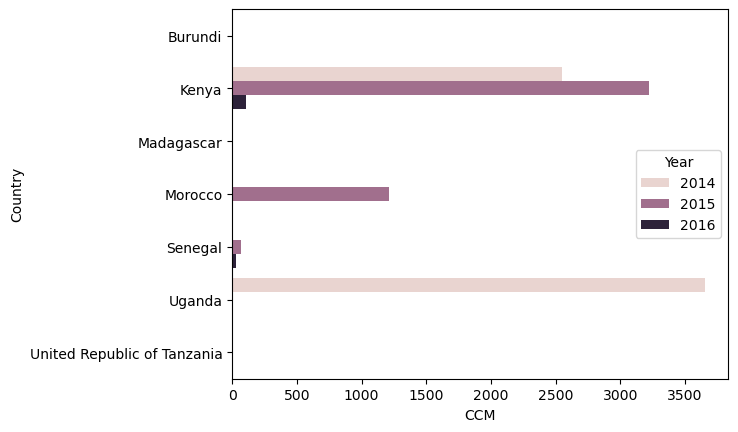

Folder Americas already exist. Overwriting files


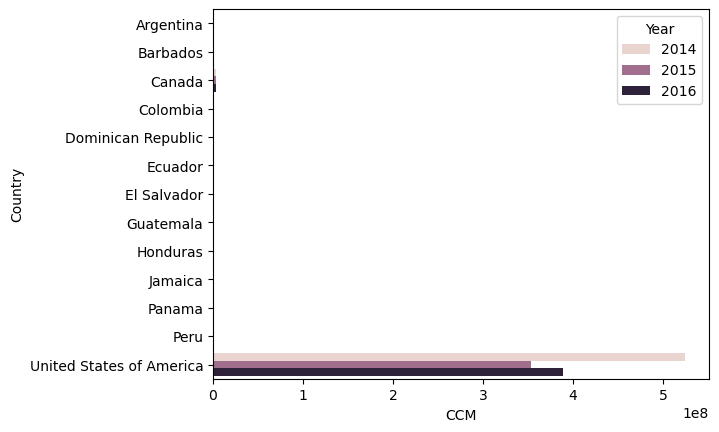

Folder Asia already exist. Overwriting files


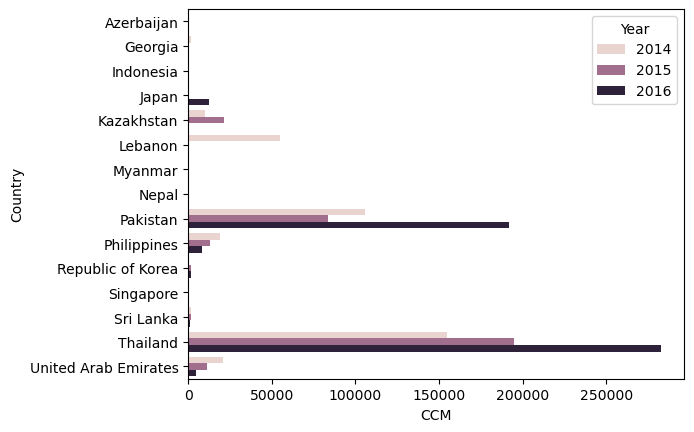

Folder Europe already exist. Overwriting files


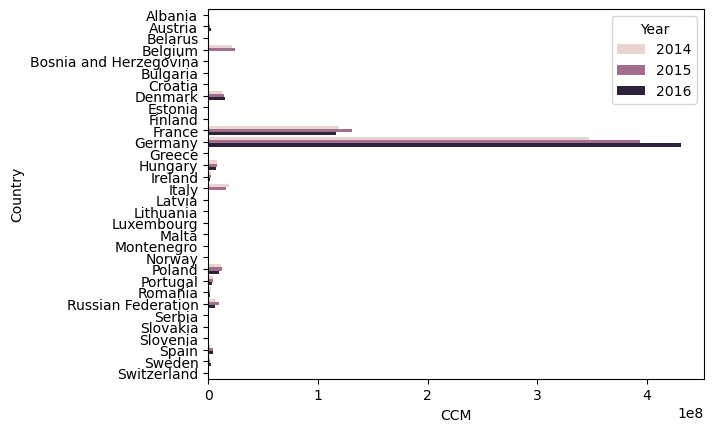

Folder Oceania already exist. Overwriting files


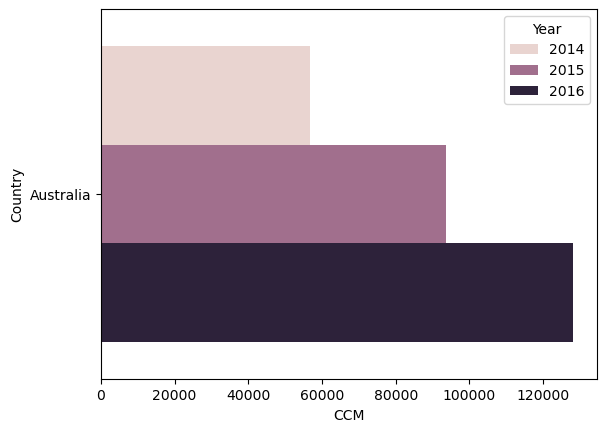

In [92]:
for name, group in agents: 
    try:
        os.mkdir(name)
    except:
        print(f"Folder {name} already exist. Overwriting files")

    group.to_csv(name + "/raw.csv")
    g_pivot = group.pivot_table(index=["Sub Region", "Country"], columns= "Year", values=["CCM", "Count", "Value Extended"], margins=True)
    g_pivot.to_excel(name + "/pivot.xlsx")

    sns.barplot(data=group, y="Country", x="CCM", hue="Year")
    plt.savefig(name + "/plot.png")
    plt.show()